In [0]:
import torch
# from fastai2.vision.all import *
# from fastai2.callback.all import *
from fastai.vision import *
from fastai.basics import *
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

defaults.device = torch.device('cuda') # makes sure the gpu is used

In [0]:
lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
)
def label_func(fname):
    return lbl_dict[fname]
# def get_labels(file_path): return '3' if '/3/' in str(file_path) else '7'

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
def get_callbacks(model_name):
  return [
          # SaveModelCallback(model_name, every='improvement', monitor='accuracy', name='best'),
          ReduceLROnPlateauCallback(model_name, patience = 5, min_lr = 1e-6 )
          ]

In [0]:
model = models.resnet18

## Imagenette-160

In [0]:
# !unzip imagenette2-160.zip -d .

In [0]:
from os import path

if not path.exists('./imagenette2-160'):
  !pip install wget;

  import wget
  wget.download('https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz', './imagenette2-160.tgz');
  !tar -xvf ./imagenette2-160.tgz;
  !rm imagenette2-160.tgz

In [0]:
path =  './imagenette2-160'

im_loader = ImageDataBunch.from_folder(path, train='train', valid_pct=0.2, size = 160).normalize(imagenet_stats)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-04
Min loss divided by 10: 4.79E-03


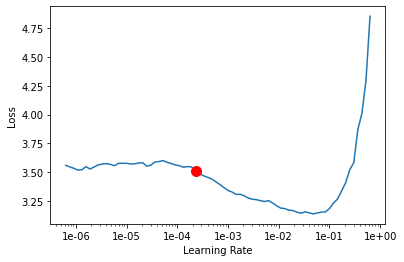

In [0]:
learn = cnn_learner(im_loader, model, metrics=[accuracy], pretrained=False)
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
#assert(False)

In [0]:
learn.fit_one_cycle(15, 2e-2)

# learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,1.979158,17.758823,0.265123,00:24
1,2.034711,10.133318,0.261016,00:24
2,2.202428,10.523930,0.212845,00:24
3,1.780847,1.517724,0.472741,00:24
4,1.412462,2.586548,0.435026,00:24
5,1.383777,1.262139,0.585138,00:24
6,1.123519,1.269260,0.588125,00:24
7,1.005747,0.962235,0.683719,00:24
8,0.806940,0.977134,0.687453,00:23
9,0.703858,0.898247,0.723301,00:24


## Stylized-imagenette-160

In [0]:
import os
if not os.path.isdir('./stylized-imagenette2-160'):
  import gdown
  url = 'https://drive.google.com/uc?id=1uWdWq_GWzyG8iUzd9bwEugNqnlo_yXFq'
  output = 'stylized-imagenette2-160.zip'
  gdown.download(url, output, quiet=False)
  !unzip "stylized-imagenette2-160.zip" -d .

In [0]:
# %rm -r /content/stylized-imagenet-160

In [0]:
np.random.seed(42)
path = './stylized-imagenette2-160'
sin_loader = ImageDataBunch.from_folder(path, train='train', valid_pct=0.2, size=160).normalize(imagenet_stats)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.51E-03
Min loss divided by 10: 3.31E-03


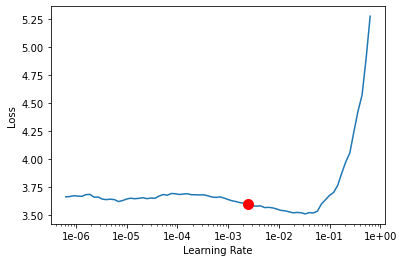

In [0]:
stylized_learn = cnn_learner(sin_loader, model, metrics=accuracy, pretrained=False)
stylized_learn.lr_find()
stylized_learn.recorder.plot(suggestion=True)

In [0]:
#assert(False)

In [0]:
# https://docs.fast.ai/callbacks.tracker.html#SaveModelCallback
stylized_learn.fit_one_cycle(15, 1e-2)

# stylized_learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,2.710010,2.196184,0.234877,00:24
1,2.342725,7.603694,0.187453,00:23
2,2.154807,2.407008,0.269978,00:23
3,2.180224,6.856747,0.098208,00:23
4,1.926083,2.260221,0.301718,00:23
5,1.701133,1.935596,0.367812,00:23
6,1.533537,1.671072,0.443241,00:22
7,1.383344,1.433335,0.522778,00:22
8,1.136956,1.369704,0.547050,00:22
9,0.835953,1.419752,0.557879,00:23


# Test set results

In [0]:
from copy import deepcopy

path =  './imagenette2-160'
in_loader_test = ImageDataBunch.from_folder(path, train='train', valid='val',size=160).normalize(imagenet_stats)
test_set_in = deepcopy(in_loader_test.valid_dl)


In [0]:
path = './stylized-imagenette2-160'
sin_loader_test = ImageDataBunch.from_folder(path, train='train', valid='val',size=160).normalize(imagenet_stats)
test_set_sin = deepcopy(sin_loader_test.valid_dl)

## SIN --> SIN

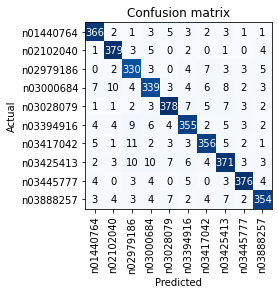

In [0]:
stylized_learn.data.valid_dl = test_set_sin
interp_sin = ClassificationInterpretation.from_learner(stylized_learn)
interp_sin.plot_confusion_matrix()

In [0]:
stylized_learn.validate(test_set_sin, metrics = [accuracy])

[0.39320603, tensor(0.9182)]

## SIN --> IN

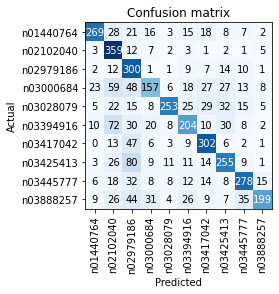

In [0]:
stylized_learn.data.valid_dl = test_set_in
interp_in = ClassificationInterpretation.from_learner(stylized_learn)
interp_in.plot_confusion_matrix()

In [0]:
stylized_learn.validate(test_set_in, metrics = [accuracy])

[1.6733329, tensor(0.6563)]

## IN --> IN

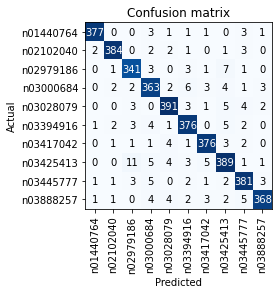

In [0]:
learn.data.valid_dl = test_set_in
interp_in = ClassificationInterpretation.from_learner(learn)
interp_in.plot_confusion_matrix()

In [0]:
learn.validate(test_set_in, metrics = [accuracy])

[0.17315154, tensor(0.9544)]

## IN --> SIN


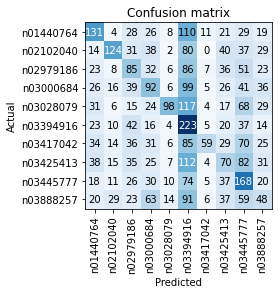

In [0]:
learn.data.valid_dl = test_set_sin
interp_sin = ClassificationInterpretation.from_learner(learn)
interp_sin.plot_confusion_matrix()

In [0]:
learn.validate(test_set_sin, metrics = [accuracy])

[3.6506755, tensor(0.2797)]

## SIN + IN --> IN

In [0]:
if not os.path.isdir('./sin-in'):
  import gdown
  url = 'https://drive.google.com/uc?id=1VwQkoxr7dhwnbJx7RRnaopqSf3o7VmR1'
  output = 'sin-in.zip'
  gdown.download(url, output, quiet=False)
  !unzip "sin-in.zip" -d .

In [0]:
np.random.seed(42)
path = './sin-in'
sinin_loader = ImageDataBunch.from_folder(path, train='train', valid_pct=0.2,size=160).normalize(imagenet_stats)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-04
Min loss divided by 10: 5.75E-03


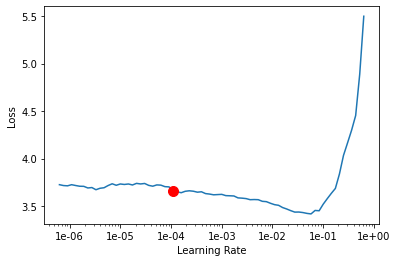

In [0]:
sinin_learn = cnn_learner(sinin_loader, model, metrics=accuracy, pretrained=False)
sinin_learn.lr_find()
sinin_learn.recorder.plot(suggestion=True)

In [0]:
# assert(false)

In [0]:
# https://docs.fast.ai/callbacks.tracker.html#SaveModelCallback
sinin_learn.fit_one_cycle(15, 1e-2)

# sinin_learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,2.270296,1.976866,0.341236,00:45
1,1.914040,1.768924,0.421878,00:44
2,1.709168,1.792174,0.401344,00:45
3,1.387308,1.735102,0.462759,00:45
4,1.176489,1.075149,0.647191,00:46
5,0.977060,1.027213,0.666791,00:45
6,0.812528,0.894212,0.713272,00:46
7,0.575603,0.933287,0.714952,00:46
8,0.363781,0.822188,0.756393,00:47
9,0.186149,0.869209,0.777301,00:48


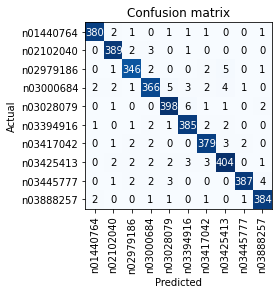

In [0]:
sinin_learn.data.valid_dl = test_set_in
interp_sinin = ClassificationInterpretation.from_learner(sinin_learn)
interp_sinin.plot_confusion_matrix()

In [0]:
sinin_learn.validate(test_set_in, metrics = [accuracy])

[0.15103234, tensor(0.9727)]

## SIN + IN + finetune(IN)-> IN

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Failed to compute the gradients, there might not be enough points.


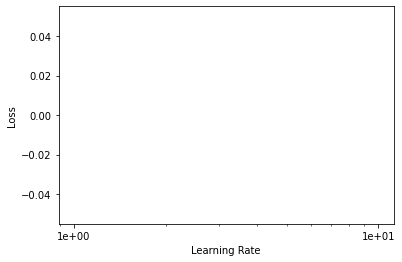

In [0]:
train_set_in = deepcopy(in_loader_test.train_dl)

sinin_finetune_learn = deepcopy(sinin_learn)
sinin_finetune_learn.data.train_dl = train_set_in # use only IN dataset for finetune
sinin_finetune_learn.unfreeze()
sinin_finetune_learn.lr_find()
sinin_finetune_learn.recorder.plot(suggestion=True)
sinin_finetune_learn.freeze() 

In [0]:
# assert(False)

In [0]:
# sinin_learn.summary()

In [0]:
# sinin_finetune_learn.summary()

In [0]:
sinin_finetune_learn.fit_one_cycle(15, 2e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.170905,0.147360,0.971975,00:23
1,0.167578,0.142749,0.971210,00:23


KeyboardInterrupt: ignored

In [0]:
sinin_finetune_learn.data.valid_dl = test_set_in
interp_sinin_finetune = ClassificationInterpretation.from_learner(sinin_finetune_learn)
interp_sinin_finetune.plot_confusion_matrix()

In [0]:
sinin_finetune_learn.validate(test_set_in, metrics = [accuracy])

## Noise resistance

### custom transform

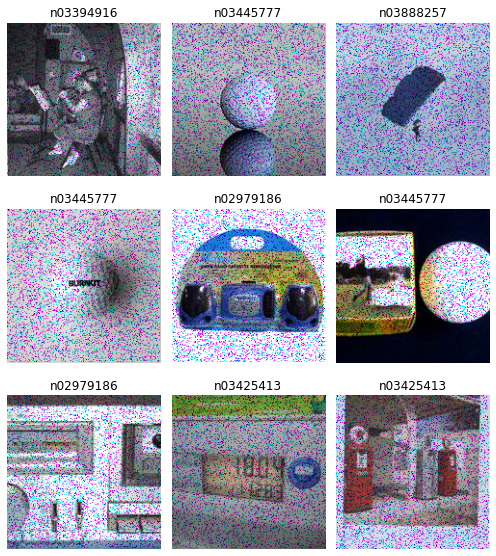

In [0]:
import cv2
import warnings
warnings.filterwarnings('ignore')

def _noise(x, amount):
  x = image2np(x*255).astype('uint8')
  row,col,ch = x.shape
  s_vs_p = 0.5
  # Salt mode
  num_salt = np.ceil(amount * x.size * s_vs_p)
  coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in x.shape]
  x[coords] = 1

  # Pepper mode
  num_pepper = np.ceil(amount* x.size * (1. - s_vs_p))
  coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in x.shape]
  x[coords] = 0

  x = pil2tensor(x,np.float32)
  x.div_(255)

  return x

noise = TfmPixel(_noise)
data = ImageDataBunch.from_folder(
        path,
        train='train', valid='val',
        ds_tfms=[
                  [noise(amount=0.1)], [noise(amount=0.1)]
                  ],
        size=160).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7, 8))

In [0]:
magnitude = 0.04
path = './imagenette2-160'


noise_ins = [
             (
              # magnitude,
              amount,
              ImageDataBunch.from_folder(
                path,
                train='train', valid='val',
                ds_tfms=[
                        #  [jitter(magnitude=magnitude)], [jitter(magnitude=magnitude)]
                         [noise(amount=amount)], [noise(amount=amount)]
                         ],
                size=160).normalize(imagenet_stats))
              # for magnitude in [0.0, 0.2, 0.4, 0.6, 0.9]]
              for amount in [0.004, 0.01, 0.05, 0.1, 0.5]]



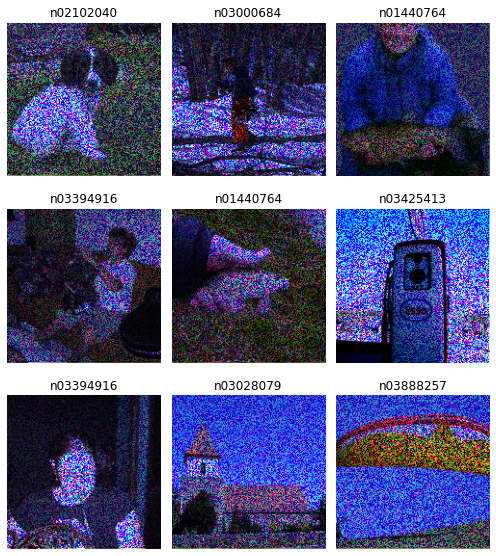

In [0]:
noise_ins[-1][1].show_batch(rows=3, figsize=(7, 8))

In [0]:
import matplotlib.pyplot as plt


In [0]:
in_results = []
for magnitude, data in noise_ins:
  metrics = learn.validate(data.valid_dl, metrics = [accuracy, top_k_accuracy])
  in_results.append(metrics[1])
  print('in', magnitude, metrics)

in 0.04 [0.17771293, tensor(0.9539), tensor(0.9954)]


in 0.04 [0.18655191, tensor(0.9529), tensor(0.9952)]


in 0.04 [0.3158939, tensor(0.9042), tensor(0.9934)]


in 0.04 [0.552049, tensor(0.8275), tensor(0.9901)]


in 0.04 [2.3720767, tensor(0.4194), tensor(0.7625)]


In [0]:
sin_results = []
for magnitude, data in noise_ins:
  metrics = stylized_learn.validate(data.valid_dl, metrics = [accuracy, top_k_accuracy])
  sin_results.append(metrics[1])

  print('sin', magnitude, metrics)

sin 0.04 [1.6763096, tensor(0.6571), tensor(0.9455)]


sin 0.04 [1.6774085, tensor(0.6525), tensor(0.9457)]


sin 0.04 [1.7115955, tensor(0.6502), tensor(0.9455)]


sin 0.04 [1.7638175, tensor(0.6329), tensor(0.9465)]


sin 0.04 [3.292825, tensor(0.3870), tensor(0.8265)]


In [0]:
sinin_results = []
for magnitude, data in noise_ins:
  metrics = sinin_learn.validate(data.valid_dl, metrics = [accuracy, top_k_accuracy])
  sinin_results.append(metrics[1])

  print('sin+in', magnitude, metrics)

sin+in 0.04 [0.15218864, tensor(0.9725), tensor(0.9969)]


sin+in 0.04 [0.14805606, tensor(0.9735), tensor(0.9972)]


sin+in 0.04 [0.15829566, tensor(0.9710), tensor(0.9964)]


sin+in 0.04 [0.20356977, tensor(0.9580), tensor(0.9959)]


sin+in 0.04 [1.5815945, tensor(0.6601), tensor(0.9493)]


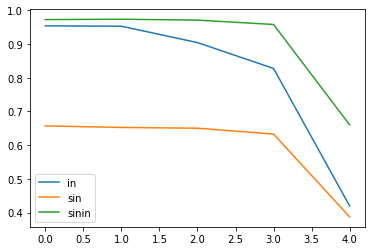

In [0]:
plt.plot(in_results, label='in')
plt.plot(sin_results, label = 'sin')
plt.plot(sinin_results, label='sinin')
plt.legend()

plt.show()